<a href="https://colab.research.google.com/github/PeixotoJr/ADD_Python/blob/main/c5_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantidades e Proporções**
<hr>


Em muitos casos não estamos interessados na evolução dos dados ou mesmo na sua distribuição, mas queremos acessar os valores diretamente em suas unidades, exibindo esses valores para diferentes classes ou suas proporções (razão entre valores).    

Para isso gráficos de barras e suas variantes são em geral os gráficos mais úteis e empregados. Um gráfico de barras apresenta a relação entre uma variável numérica e uma variável categórica sendo cada valor da variável categórica representado por uma barra vertical ou horizontal. O tamanho da barra representa o valor ou as quantidades.

Embora muitas vezes descrito como uma maneira 'enfadonha' de visualizar os dados os gráficos de barra são a forma mais eficiente de mostrar esse tipo de informação.

Gráficos de pizza têm um propósito semelhante. Neles um círculo é dividido em setores e cada valor é representado pela proporção do setor dentro do círculo. São representações populares e frequentemente empregadas para mostrar proporções já que a soma dos setores é igual a 100%. Mas, como você verá adiante, temos muita dificuldade em traduzir ângulos para valores e esses gráficos, em geral, produzem uma representação muito pobre dos dados e devem ser evitados. A mesma informação poderá sempre ser melhor representada por gráficos de barras equivalentes. De qualquer forma veremos também como produzir esses gráficos e discutir suas desvantagens.

Existem ainda alguns outros tipos de gráficos que podemos considerar, variantes dos gráficos de barra e pizza, como mapas de árvores que exibem dados hierárquicos como um conjunto de retângulos aninhados, e veremos ainda outras alternativas para representarmos quantidades, proporções e compararmos valores de diferentes classes.








## Gráficos de Barras

Embora possamos encontrar gráficos similares mais antigos, atribuí-se a William Playfair (Beniger & Dorothy, 1978) a criação do gráfico de barras em uma representação de Exportações e Importações da Escócia em 1786. Desde então esses gráficos são usados para representar dados quantidades e proporções e são bastante eficientes em comunicar essas informações.

Gráficos de barras apresentam relações entre uma variável numérica e uma variável categórica sendo cada valor da variável categórica representado por uma barra, vertical ou horizontal, em que o tamanho da barra representa o valor numérico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Em sua forma mais simples um gráfico de barras do `Matplotlib` recebe dois parâmetros, a variável categórica e os valores numéricos associados.

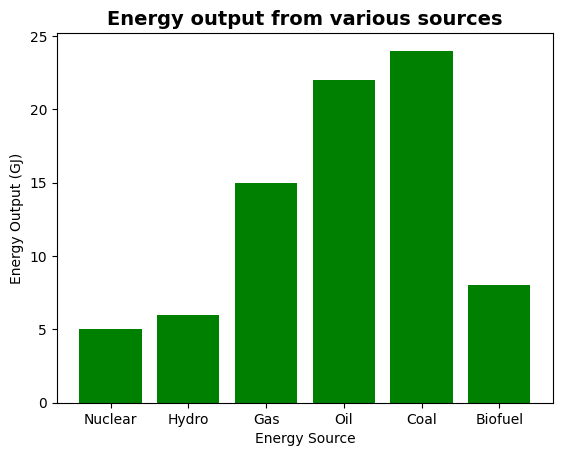

In [2]:
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]

plt.bar(energy_type, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

Mas vamos explorar um conjunto de dados mais complexo e reais considerando dados da Matriz Energética Européia.

Abaixo você pode ver as quantidades de energia produzidas na França e Alemanha para cada uma das categorias de fonte de energia para o ano de 2018. Fica evidente no gráfico a dependência de fontes de energia nuclear e térmica nas matrizes energéticas, respectivamente da França e Alemanha, e esse comparativo de quantidades e proporções é um dos principais usos dos gráficos de barra. As barras podem, do mesmo modo, ser representadas na vertical (`bar`) ou na horizontal (`barh`).  



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/energy_types.csv')

df.dropna(inplace=True)
df.sort_values(['country_name','type'],inplace=True)
df.reset_index(drop=True, inplace=True)

fr = df[ df.country_name == 'France' ] # separando dados da França
de = df[ df.country_name == 'Germany' ] # separando dados da Alemanha

df.head()

,country,country_name,type,level,2016,2017,2018
0,AL,Albania,Conventional thermal,Level 1,0.0,0.000,0.000
1,AL,Albania,Geothermal,Level 1,0.0,0.000,0.000
2,AL,Albania,Hydro,Level 1,7136.0,4496.607,8596.537
3,AL,Albania,Nuclear,Level 1,0.0,0.000,0.000
4,AL,Albania,Other,Level 1,0.0,0.000,0.000


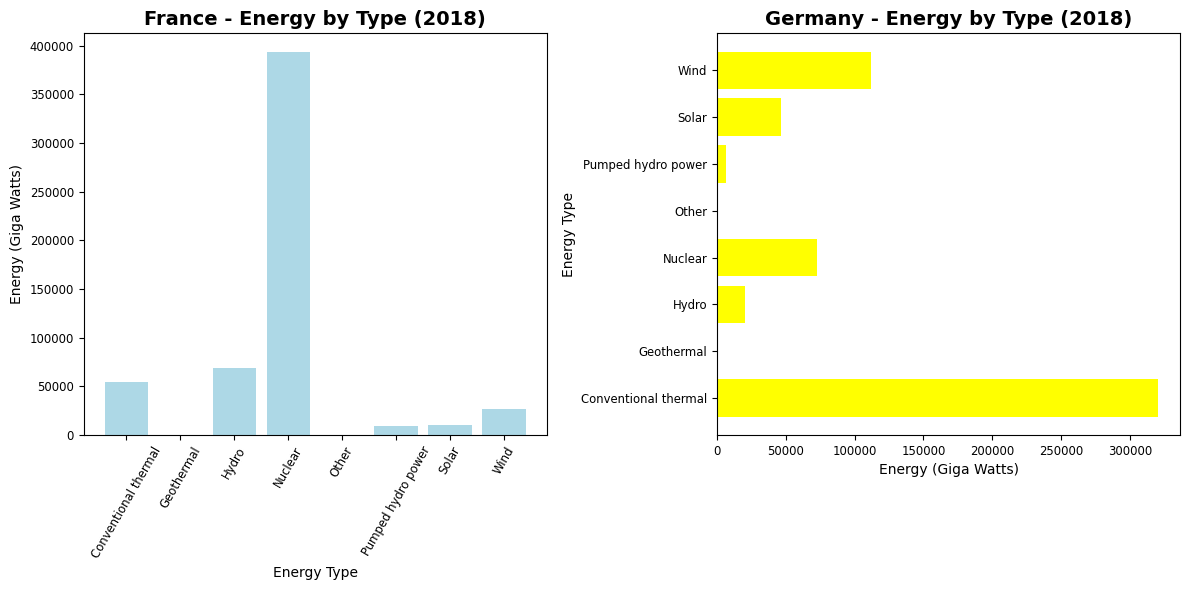

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.bar(fr['type'], fr['2018'], color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.subplot(1,2,2)

plt.barh(de['type'], de['2018'], color='yellow')
plt.ylabel("Energy Type")
plt.xlabel("Energy (Giga Watts)")
plt.title("Germany - Energy by Type (2018)", fontsize=14, weight='bold')

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.show()

##$\bigstar \text{  }$ Gráficos de Barras $\times$ Histogramas

Mas antes de seguirmos vamos entender aqui um erro muito comum que é confundirmos gráficos de barras e histogramas, em especial quando interpretarmos os gráficos.  

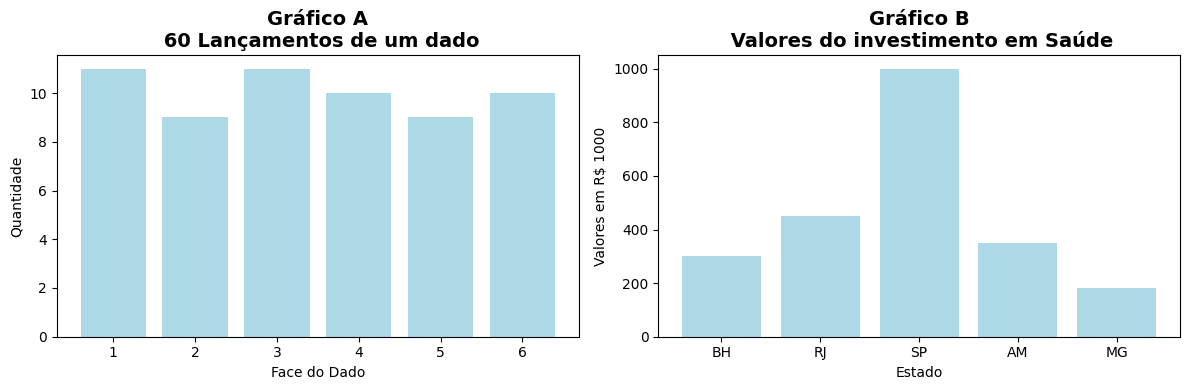

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar([1,2,3,4,5,6],[11,9,11,10,9,10], color='lightblue')
plt.title('Gráfico A\n 60 Lançamentos de um dado', fontsize=14, weight='bold')
plt.xlabel('Face do Dado')
plt.ylabel('Quantidade')

plt.subplot(1,2,2)
plt.bar(['BH','RJ','SP','AM','MG'],[300,450,1000,350,180], color='lightblue')
plt.title('Gráfico B\n Valores do investimento em Saúde', fontsize=14, weight='bold')
plt.xlabel('Estado')
plt.ylabel('Valores em R$ 1000')

plt.tight_layout()
plt.show()

Perguntando a 10 estudantes quais dos gráficos acima são histogramas, A), ou B), ou A) e B), ou ainda nenhum deles, 9 respondem que B) é um histograma quando, de fato, apenas A) é um histograma. E isso é um resultado real de resposta dos alunos!

Assim, vamos lembrar que um histograma é a representação de uma variável em duas dimensões, os seus valores ou classes de valores e a frenquencia desses valores. No caso do gráfico A), os valores são as faces do dado após o lançamento e o eixo y representa a quantidade de vezes que cada valor foi obtido. É uma distribuição uniforme, uma vez que todos os valores tem probabilidade $1/6$. Já o segundo gráfico é um típico gráfico de barras, onde temos uma variável categórica (os Estados) e os valores de uma outra variável (os investimentos com Saúde) representados pela altura das barras.




## Adicionando Rótulo dos Valores às Barras

Gráficos buscam privilegiar a comunicação do visual em detrimento do texto e de anotações. De qualquer modo é uma demanda bastante frequente a adição dos valores às barras nesse tipo de gráfico. O `Matplotlib` não fornece qualquer parâmetro ou função para fazer isso diretamente e então, você pode achar útil a função abaixo que emprega o `annotate()` para adicionar os rótulos dos valores no final das barras e você também pode adaptar esse código para exibição em outros laytouts.

In [6]:
def autolabel(rects,ax,s=10,w='normal',c='k'):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=s, weight=w, color=c)

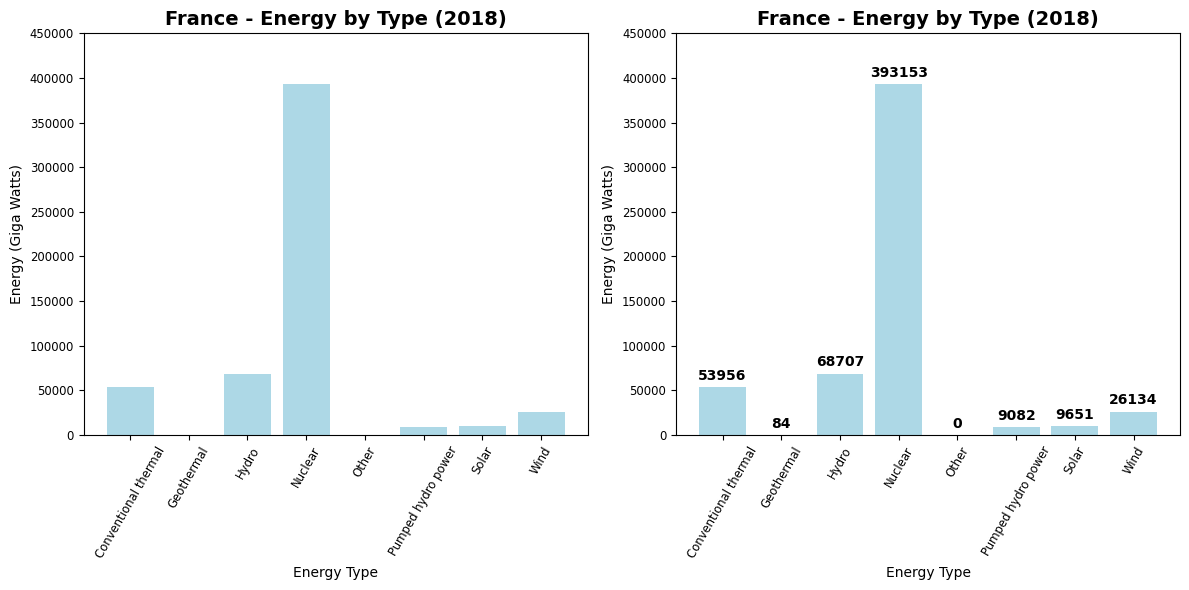

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.bar(fr['type'], fr['2018'], color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.ylim([0,450000])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.subplot(1,2,2)

rects1 = plt.bar(fr['type'], fr['2018'], color='lightblue')
autolabel(rects1, plt, 10, w='bold')

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("France - Energy by Type (2018)", fontsize=14, weight='bold')

plt.ylim([0,450000])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.show()

## Combinando Gráficos de Barra

O gráfico acima é útil para exibir as quantidades energia por origem em cada país. Mas se você estiver interessado em comparar os países parece útil combinarmos os gráficos de cada país em um único gráfico.

A forma mais simples e eficaz de combinarmos gráficos de barras será dispormos as barras lado a lado. Mas, antes de apresentarmos e você entender por que essa é talvez a melhor solução, vale a pena explorarmos outras alternativas, seja para evitarmos o seu uso ou por que elas poderão ser úteis a você em algum cenário.



### Sobreposição

Esta é uma forma que em geral deve ser evitada. Os valores do segundo gráfico irão sobrepor o primeiro e, a menos que você tenha a garantia de que todos os valores do segundo gráfico são menores que do primeiro, as informações do primeiro gráfico serão perdidas.



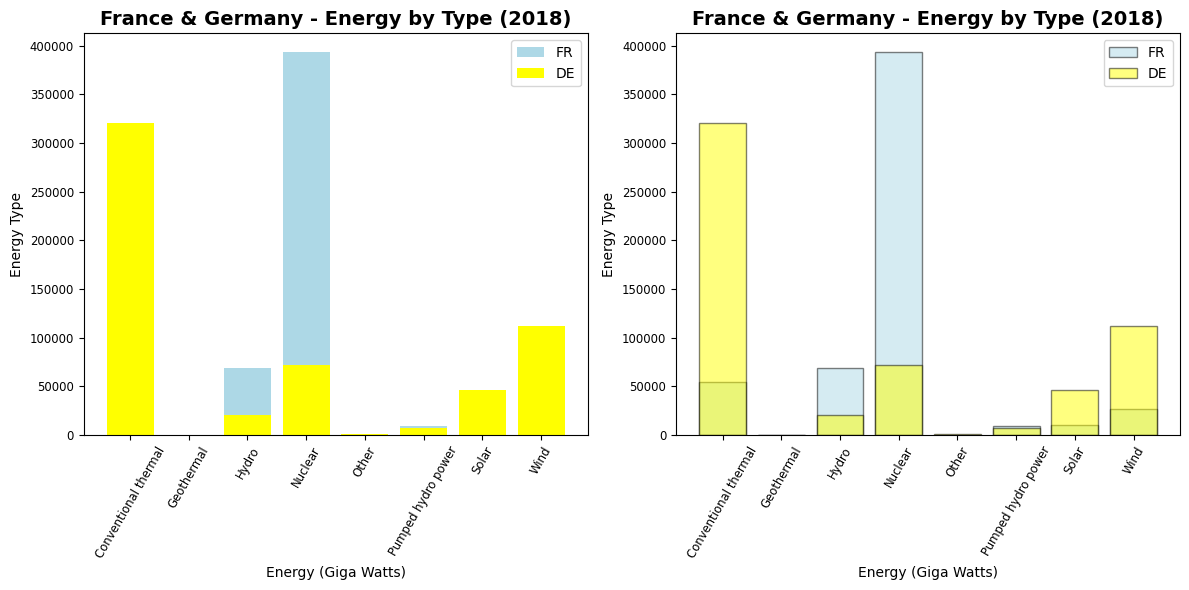

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.bar(fr['type'], fr['2018'], color='lightblue', label='FR')
plt.bar(de['type'], de['2018'], color='yellow', label='DE')

plt.ylabel("Energy Type")
plt.xlabel("Energy (Giga Watts)")
plt.title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')
plt.legend()

plt.subplot(1,2,2)

plt.bar(fr['type'], fr['2018'], color='lightblue', label='FR',alpha=0.5,edgecolor='k')
plt.bar(de['type'], de['2018'], color='yellow', label='DE',alpha=0.5,edgecolor='k')

plt.ylabel("Energy Type")
plt.xlabel("Energy (Giga Watts)")
plt.title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')
plt.legend()

plt.tight_layout()

plt.show()

Os valores de para `Conventional Thermal` da Alemanha (segunda camada de gráfico aplicada) são maiores que da França (primeira camada) e, assim, os valores da França não são exibidos. Para os valores de energia `Nuclear`, entretanto, em que os valores da França são maiores, os valores da Alemanha e França são exibidos corretamente.

O segundo gráfico emprega a transparência e contorno às barras deixa claro o problema ou risco desse tipo de exibição. Mas usar esse recurso também não é uma alternativa pois as informações ficam também bastante confusas.

Mas essa é uma alternativa bastante clara de apresentação se tivermos certeza de que todos os valores da segunda camada são inferiores ao da primeira, e essa forma de representação pode ajudar a comunicar isso. Assim, esse modo de representação não deve ser totalmente descartado, apenas devemos tomar cuidado ao empregar essa forma de representação. Encontraremos cenários semelhantes para as demais forma de combinação de gráficos.

### Empilhados

O parâmetro `bottom` pode ser empregado no comando `plt.bar` para empilharmos as barras de diferentes gráficos de barra. Ele define o piso (*bottom*) a partir do qual a barra do próximo gráfico é iniciada.





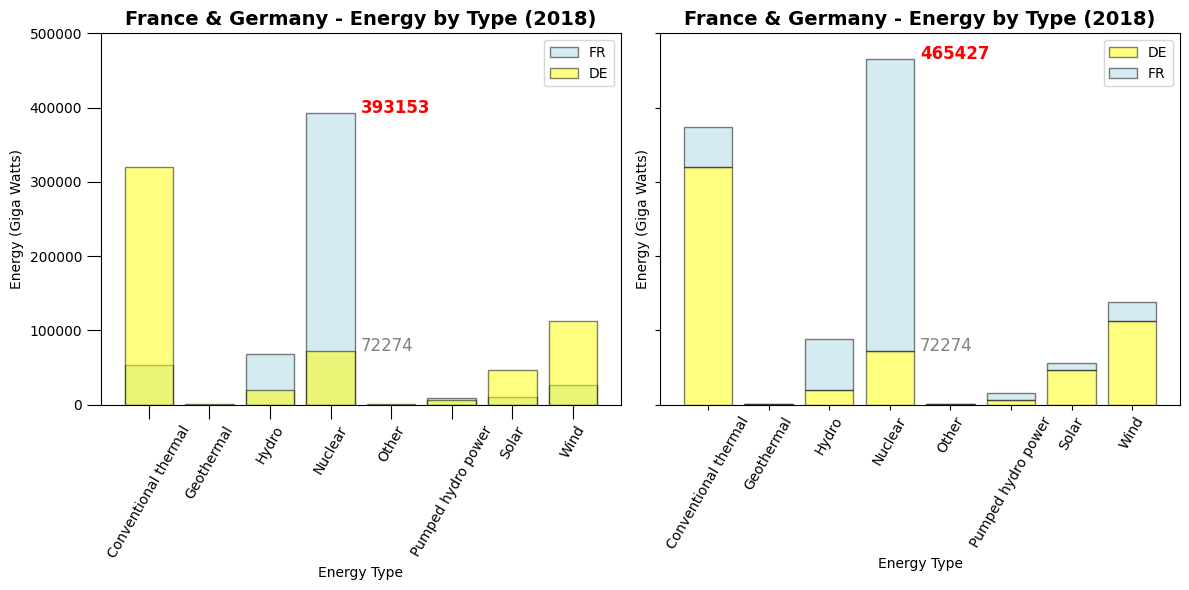

In [9]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

ax[0].bar(fr['type'], fr['2018'], color='lightblue', label='FR',alpha=0.5,edgecolor='k')
ax[0].bar(de['type'], de['2018'], color='yellow', label='DE',alpha=0.5,edgecolor='k')

ax[0].set_xlabel("Energy Type")
ax[0].set_ylabel("Energy (Giga Watts)")
ax[0].set_title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')
ax[0].set_ylim([0,500000])

ax[0].tick_params(axis='x', rotation=60, size=10)
ax[0].tick_params(axis='y', size=10)
ax[0].legend()

ax[0].text(3.5, de[de['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(de[de['type'] == 'Nuclear']['2018'].values[0]), color='grey', fontsize=12)
ax[0].text(3.5, fr[fr['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(fr[fr['type'] == 'Nuclear']['2018'].values[0]), color='r', weight='bold', fontsize=12)

ax[1].bar(de['type'], de['2018'], color='yellow', label='DE',alpha=0.5,edgecolor='k')
ax[1].bar(fr['type'], fr['2018'], bottom=de['2018'], color='lightblue', label='FR',alpha=0.5,edgecolor='k')
ax[1].set_xlabel("Energy Type")
ax[1].set_ylabel("Energy (Giga Watts)")
ax[1].set_title("France & Germany - Energy by Type (2018)", fontsize=14, weight='bold')

ax[1].text(3.5, de[de['type'] == 'Nuclear']['2018'].values[0], '{:.0f}'.format(de[de['type'] == 'Nuclear']['2018'].values[0]), color='grey', fontsize=12)
ax[1].text(3.5, fr[fr['type'] == 'Nuclear']['2018'].values[0] + de[de['type'] == 'Nuclear']['2018'].values[0],
           '{:.0f}'.format(fr[fr['type'] == 'Nuclear']['2018'].values[0] + + de[de['type'] == 'Nuclear']['2018'].values[0]),
           color='r', weight='bold', fontsize=12)

ax[1].tick_params(axis='x', rotation=60)
ax[1].legend()

plt.tight_layout()

plt.show()

Esse empilhamento precisa também ser empregado com cautela uma vez que os valores no eixo y, ou a altura das barras, passa a representar não o valor de uma categoria, mas a *soma* dos valores, com o empilhamento da barra de valores de uma camada do gráfico sobre a barra de valores da camada anterior.

Assim esse gráfico é mais útil nos casos em que de fato a soma desses valores (as barras) faz algum sentido para os dados, sendo menos útil para compararmos valores. A soma de quantidades de energia da França e Alemanha, por exemplo, ou de um grupo de países, faz sentido e pode ter utilidade, afinal é o total de energia produzido por aquele grupo. Mas existem quantidades que não são *aditivas* e, por exemplo, somar (empilhar) milhas por galão do consumo de automóveis não parece ter sentido uma vez que carros com 10mpg e 15mpg não resultam em veículos de 25mpg. Voltaremos a isso logo adiante.

### Overplotting

Assim como no caso dos histogramas essas visualizações tendem a ficar comprometidas à medida de aumentamos o número de valores e classes envolvidas.

Para vermos isso basta, por exemplo, querermos explorar apenas os 5 maiores produtores de energia da Europa em 2018.


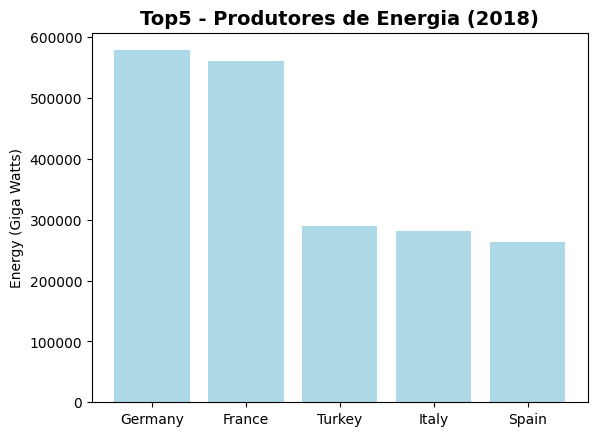

In [10]:
plt.bar(df.groupby('country_name')['2018'].sum().nlargest(5).keys(), df.groupby('country_name')['2018'].sum().nlargest(5), color='lightblue')
plt.title('Top5 - Produtores de Energia (2018)', fontsize=14, weight='bold')
plt.ylabel("Energy (Giga Watts)")
plt.show()

top5 = df.groupby('country_name')['2018'].sum().nlargest(5).keys()

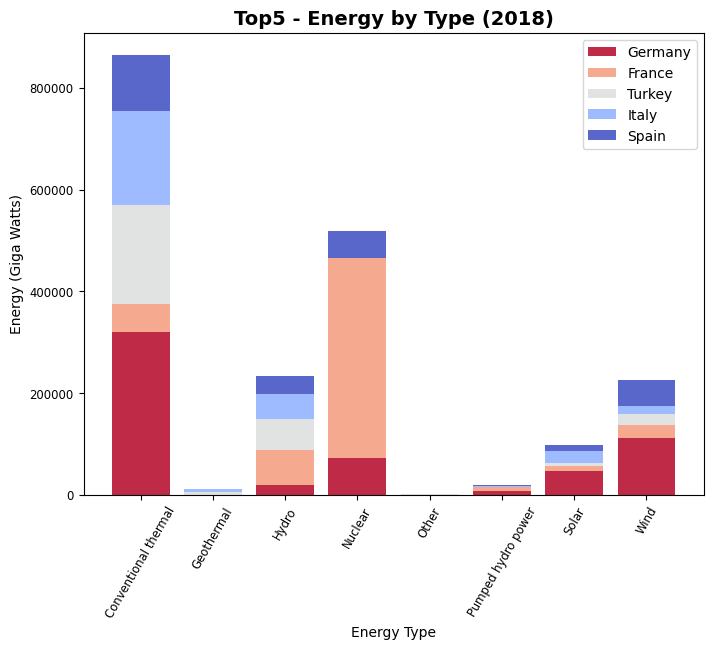

In [11]:
import matplotlib.cm as cm
cmap = cm.coolwarm_r (np.linspace(0, 1, len(top5)))

plt.figure(figsize=(8, 6))

bottom = df[df.country_name == top5[0] ]['2018'].values*0
for k, country in enumerate(top5):
  plt.bar(df[df.country_name == country ]['type'], df[df.country_name == country ]['2018'], alpha=0.85,
              bottom=bottom,
              label=country,
              color=cmap[k])
  bottom = bottom + df[df.country_name == country ]['2018'].values

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')

plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')
plt.legend()

plt.show()

Com apenas 5 países já fica bastante difícil uma análise melhor dos dados, e se você experimentar mais países verá que a visualização não permite chegar a qualquer análise ou conclusão dos dados.

### Proporções

Um gráfico melhor, neste caso, por exemplo se queremos explorar a participação de cada um desses países nas diferentes fontes de energia, parece ser empregarmos diretamente as proporções.

Esse é um tipo especial de gráfico de barras onde todas as barras tem o mesmo tamanho representando 100% dos valores e os setores de cada barra representam a razão, ou proporção, de cada classe (os países) nos valores. Para isso temos antes que produzir os valires dessas proporções e, em seguida, podermos empregar os gráficos de barras empilhados para produzir o resultado final.

In [12]:
dftop5 = df[ df.country_name.isin(top5) ]
dftop5sum = pd.DataFrame(dftop5.groupby(['type'])['2018'].sum()).reset_index()
dftop5sum = dftop5sum.rename(columns={'2018':'sum'})
dftop5 = pd.merge( dftop5, dftop5sum, on='type')
dftop5['proporcao'] = dftop5['2018'] / dftop5['sum']
dftop5.head()


,country,country_name,type,level,2016,2017,2018,sum,proporcao
0,FR,France,Conventional thermal,Level 1,60607.854,68922.949,53956.440,864677.925,0.062401
1,FR,France,Geothermal,Level 1,87.933,119.937,84.084,12232.707,0.006874
2,FR,France,Hydro,Level 1,64879.956,54432.864,68706.552,233972.417,0.293652
3,FR,France,Nuclear,Level 1,384008.125,379093.955,393153.254,518698.187,0.757961
4,FR,France,Other,Level 1,559.515,673.710,0.000,1225.877,0.000000


In [13]:
dftop5.groupby('type')['proporcao'].sum()

,proporcao
type,
Conventional thermal,1.0
Geothermal,1.0
Hydro,1.0
Nuclear,1.0
Other,1.0
Pumped hydro power,1.0
Solar,1.0
Wind,1.0


Agora a soma das proporções (artibuto `proporcao`) de cada tipo de energia soma 1 (100%) e podemos exibir a participação de cada país em cada tipo de energia empilhando as proporções, como no gráfico de barras empilhadas que empregamos antes.

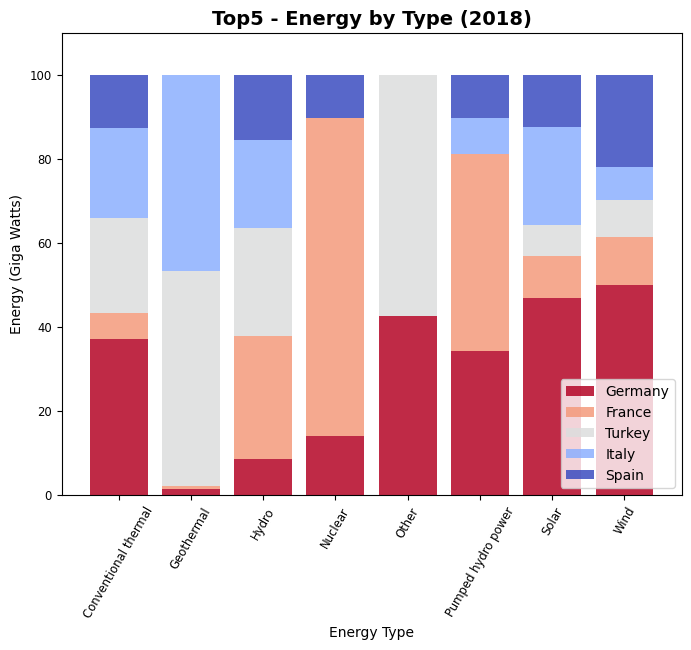

In [14]:
import matplotlib.cm as cm
cmap = cm.coolwarm_r (np.linspace(0, 1, len(top5)))

plt.figure(figsize=(8, 6))

bottom = df[df.country_name == top5[0] ]['2018'].values*0
for k, country in enumerate(top5):
  plt.bar(dftop5[dftop5.country_name == country ]['type'],
              dftop5[dftop5.country_name == country ]['proporcao'] * 100,  alpha=0.85,
              bottom=bottom,
              label=country,
              color=cmap[k])
  bottom = bottom + dftop5[dftop5.country_name == country ]['proporcao'].values * 100

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')
plt.ylim([0,110])
plt.xticks(rotation=60, fontsize='small')
plt.yticks(fontsize='small')
plt.legend()

plt.show()

### Barras Paralelas

As alternativas anteriores não devem ser totalmente descartadas e podem ter grande utilidade em comunicar melhor os dados em uma série de casos, desde que tenhamos clareza sobre os gráficos que estamos produzindo. Mas o emprego de barras paralelas parece a forma mais simples, geral e eficiente de combinarmos gráficos de barra e compararmos valores.

A construção de barras paralelas, entretanto, não é direta no `Matplotlib`. Ela requer que você crie a posição de cada elemento (empregamos `ind` abaixo) e trabalhe a largura de cada barra (empregamos `bandwidth`). Apresentamos esse procedimento no exemplo a seguir.

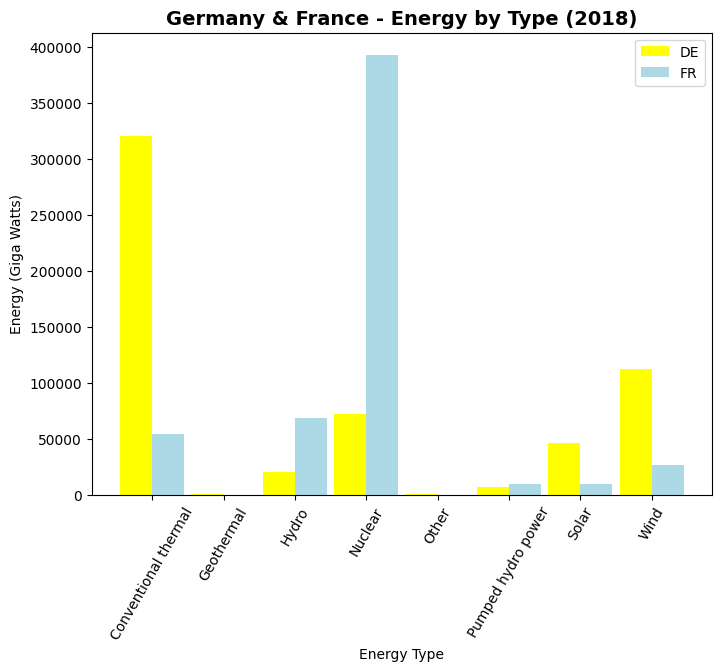

In [15]:
plt.figure(figsize=(8, 6))

ind = np.arange(len(fr['type']))
barwidth = 0.45

plt.bar(ind, de['2018'], barwidth, label='DE', color='yellow')
plt.bar(ind + barwidth, fr['2018'], barwidth, label='FR', color='lightblue')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Germany & France - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(ind + barwidth / 2, dftop5['type'].unique(), rotation=60)
plt.legend()


plt.show()

Você pode ver que Essa forma de combinação de gráficos pode ser efetiva mesmo empregando um maior número de classes de dados, como no caso dos países no nosso exemplo.

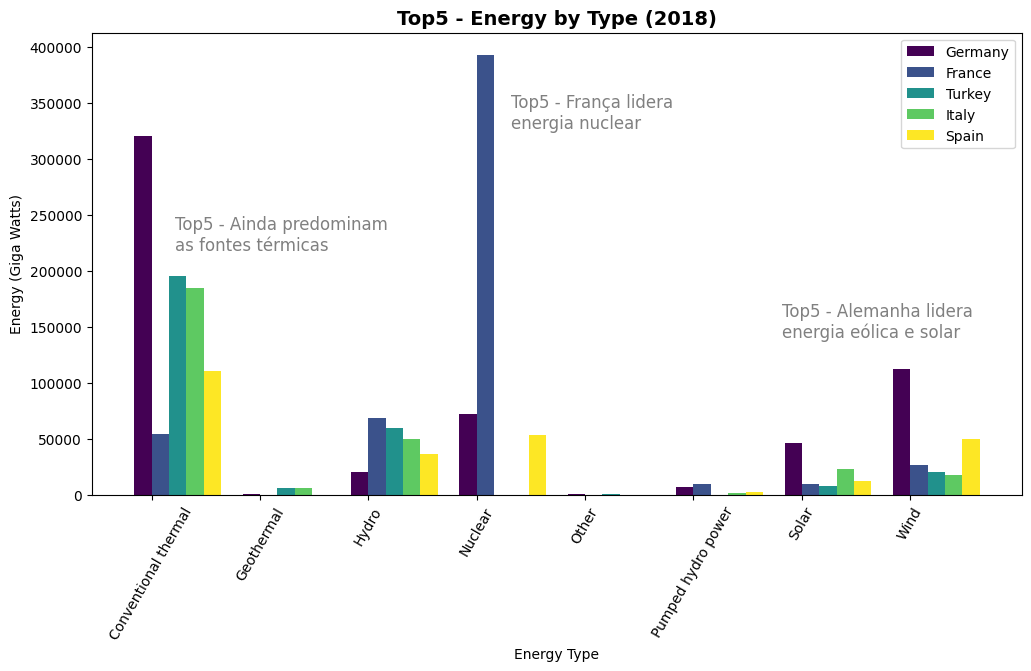

In [16]:
import matplotlib.cm as cm
cmap = cm.viridis(np.linspace(0, 1, len(top5)))

plt.figure(figsize=(12, 6))

ind = np.arange(len(fr['type']))
barwidth = 0.16

for k, country in enumerate(top5):
  plt.bar(ind + barwidth*k,
              dftop5[dftop5.country_name == country ]['2018'] ,
              barwidth,
              label=country, color=cmap[k])

plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(ind + barwidth / 2, dftop5['type'].unique(), rotation=60)
plt.legend()

plt.text(ind[0]+0.3, max(dftop5['2018']) /1.8 , 'Top5 - Ainda predominam\nas fontes térmicas', fontsize=12, color='grey')
plt.text(ind[3]+0.4, max(dftop5['2018']) /1.2, 'Top5 - França lidera\nenergia nuclear', fontsize=12, color='grey')
plt.text(ind[5]+0.9, max(dftop5['2018']) /2.8, 'Top5 - Alemanha lidera\nenergia eólica e solar', fontsize=12, color='grey')

plt.show()

#### Barras Empilhadas $\times$ Barras Paralelas

Vamos revisitar o caso de barras empilhadas e verificar os mesmos dados com o uso de barras paralelas.

Como vimos antes existem quantidades que por sua natureza não são *aditivas* e faz pouco sentido empregarmos barras empilhadas. Por exemplo, somar (empilhar) milhas por galão do consumo de automóveis não parece ter sentido uma vez que a soma não representa qualquer valor real de consumo de veículos.

Veja então esses dados representados no exemplo a seguir com barras empilhadas e, depois, com barras paralelas.

In [17]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


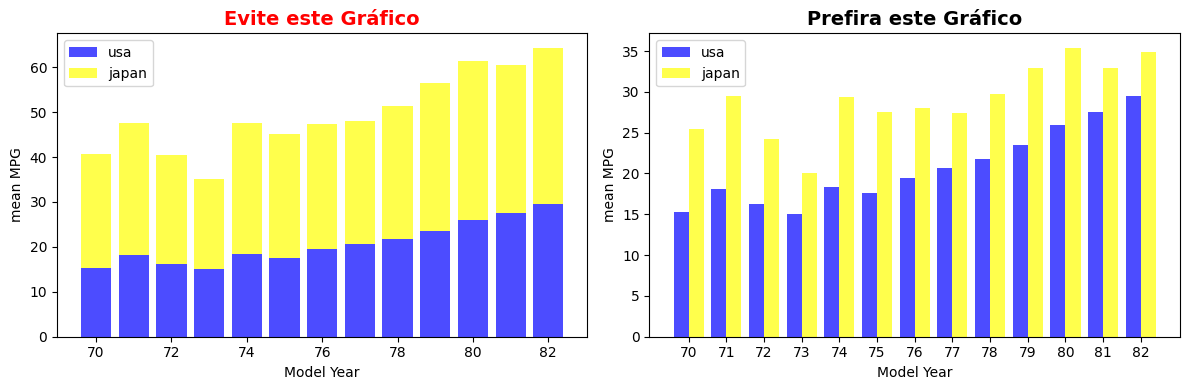

In [18]:
mpg_mean_usa = cars[cars.origin == 'usa'].groupby('model_year')['mpg'].mean()
mpg_mean_japan = cars[cars.origin == 'japan'].groupby('model_year')['mpg'].mean()

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.bar(mpg_mean_usa.keys(),mpg_mean_usa.values, label='usa', color='blue', alpha=0.7)
plt.bar(mpg_mean_japan.keys(), mpg_mean_japan.values, bottom=mpg_mean_usa.values, label='japan', color='yellow', alpha=0.7)

plt.xlabel("Model Year")
plt.ylabel("mean MPG")
plt.title("Evite este Gráfico", fontsize=14, weight='bold', color='r')
plt.legend()

plt.subplot(1,2,2)
ind = np.arange(len(mpg_mean_usa.keys()))
barwidth = 0.4

plt.bar(ind + barwidth*0, mpg_mean_usa.values, barwidth, label='usa', color='blue', alpha=0.7)
plt.bar(ind + barwidth*1, mpg_mean_japan.values, barwidth, label='japan', color='yellow', alpha=0.7)

plt.xlabel("Model Year")
plt.ylabel("mean MPG")
plt.title("Prefira este Gráfico", fontsize=14, weight='bold')
plt.xticks(ind + barwidth / 2, mpg_mean_usa.keys())
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
cars.mpg.max()

46.6

Observando o primeiro gráfico você encontrará exibidos vários valores acima de 50mpg. Entretanto, você não encontrará quaisquer veículos com valores acima de 50 mpg! Como exibe o comando `cars.mpg.max()` o valor máximo de um veículo é de $46.6$. Neste caso é claramente preferível empregar barras paralelas para se comparar os valores de cada ano e origem.

### Barras Simétricas

Uma última forma de combinarmos esses gráficos, particularmente quando comparamos duas classes de dados, pode ser empregarmos gráficos simétricos, a exemplo do que já empregamos para distribuições dos dados no capítulo anterior (Pirâmide Populacional). Isso pode ser facilmente  obtido apenas invertendo-se o sinal de uma das categorias.



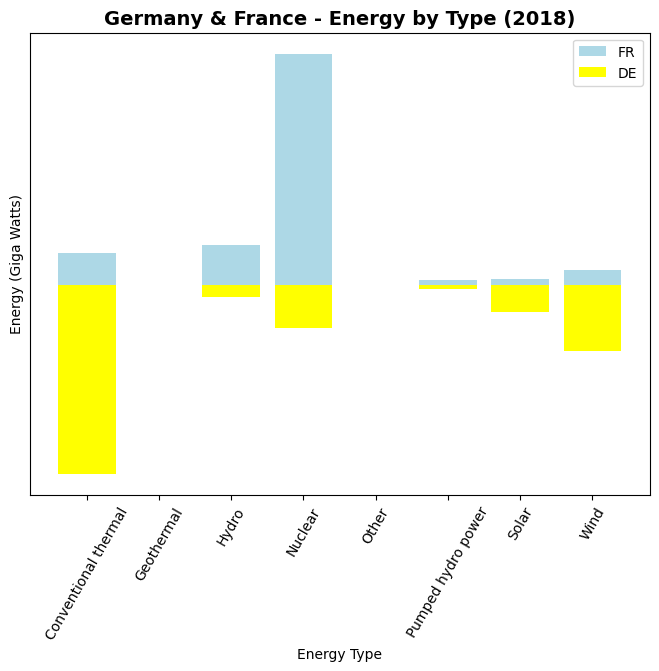

In [20]:
plt.figure(figsize=(8, 6))

plt.bar(fr['type'], fr['2018'], label='FR', color='lightblue')
plt.bar(de['type'], -de['2018'], label='DE', color='yellow')
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Germany & France - Energy by Type (2018)", fontsize=14, weight='bold')
plt.xticks(rotation=60)
plt.yticks([])
plt.legend()


plt.show()

## `Searborn`, `barplot`

Gráficos semelhantes podem ser produzidos com pacote `seaborn` e, principalmente para visões multidimensionais de dados, tornam-se mais fáceis de usar.

A sintaxe é bastante semelhante e em `sns.barplot(x,y,data=df)`, `x` e `y` são respectivamente as variáveis categóricas do conjunto de dados `df`.  

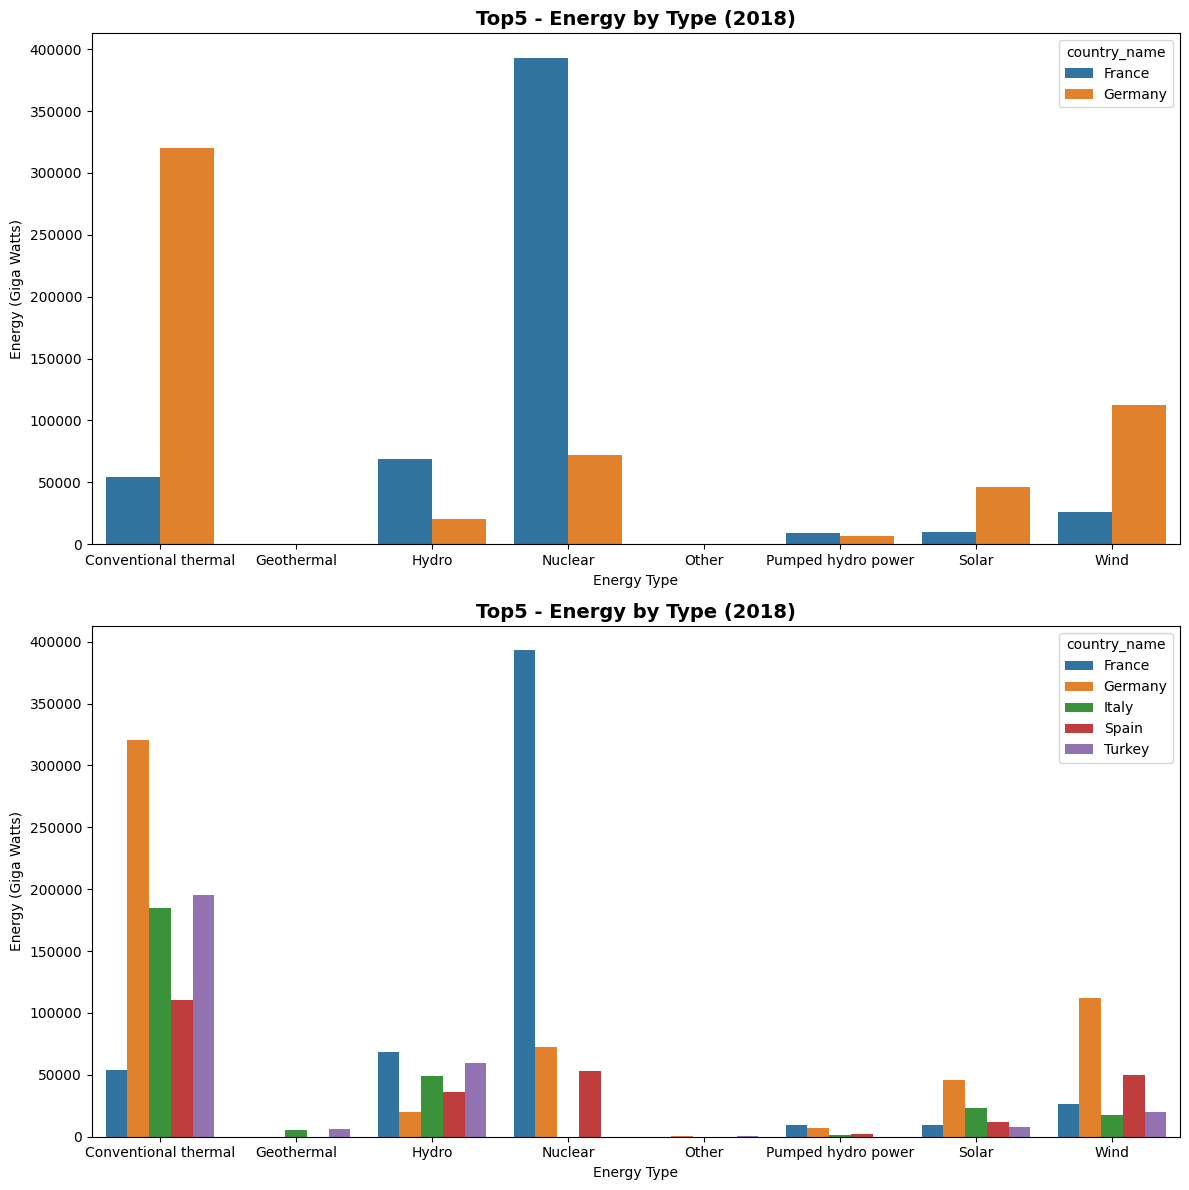

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(x='type',y='2018',hue='country_name',
            data=dftop5[ dftop5.country.isin(['FR','DE']) ])
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')

plt.subplot(2,1,2)
sns.barplot(x='type',y='2018',hue='country_name',data=dftop5)
plt.xlabel("Energy Type")
plt.ylabel("Energy (Giga Watts)")
plt.title("Top5 - Energy by Type (2018)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Há, entretanto, uma diferença e bastante grande entre gráfico de barras do `Matplotlib` e do `Seaborn` quando lidamos com múltiplos valores e que requer a sua atenção. É o que veremos a seguir.

##$\bigstar \text{  }$ Cuidado: Matplotlib `bar` $\times$ Seaborn `barplot`

Não se deixe levar pelas aparências, os resultados dos gráficos de barra do `Matplotlib` e do `Seaborn` podem diferir bastante se você estiver lidando com múltiplos valores para um mesmo valor de categoria. Embora ambos produzam gráficos de barra, eles diferem no conceito que empregam para exibir as barras de múltiplos valores dos dados e não compreender isso pode levar a grandes erros de visualização e interpretação dos resultados. Esses *conceitos* podem ser resumidos no seguinte:

* Matplotlib `bar`: exibe **todos** os valores
* Seaborn `barplot`: **valor médio** $\pm$ IC (*intervalo de confiança*, .95)

Vejamos um exemplo.


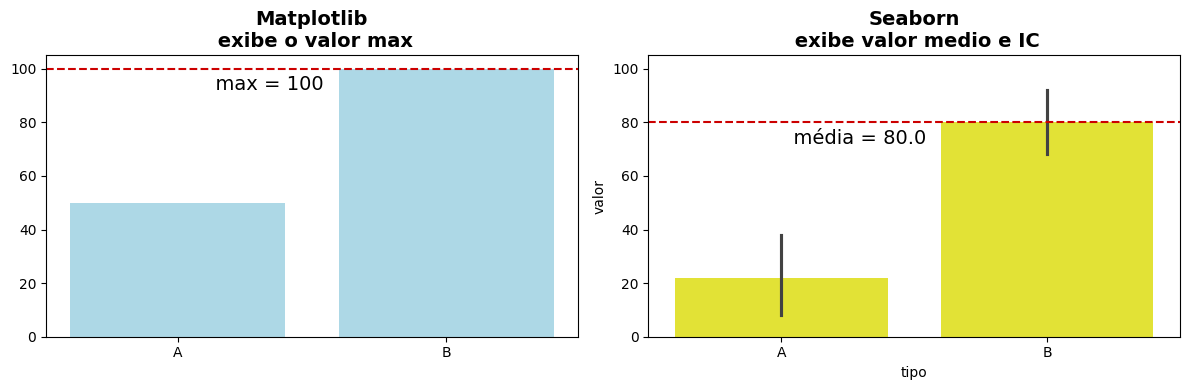

In [22]:
data = pd.DataFrame( { 'tipo': pd.Series(['A','A','A','A','A','B','B','B','B','B']),
                     'valor': pd.Series([0,10,20,30,50,60,70,80,90,100]) })

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='lightblue')

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()



Acima para cada uma das categorias `A` e `B` possuem múltiplos valores. Isso é diferente dos exemplos que fizemos até agora. Até agora, para um país e um tipo de fonte de energia e ano, havia um único valor de produção de energia.

Enquanto o `Seaborn` opta por apresentar uma média dos valores e o intervalo de confiança (a linha sobre a barra), o `Matplotlib` exibe *todos os valores*, o  quê, uma vez que os valores são sobrepostos, irá exibir apenas o maior valor.

Isso fica mais evidente se adicionarmos as linhas de contorno da barra e um grau de transparência como abaixo.

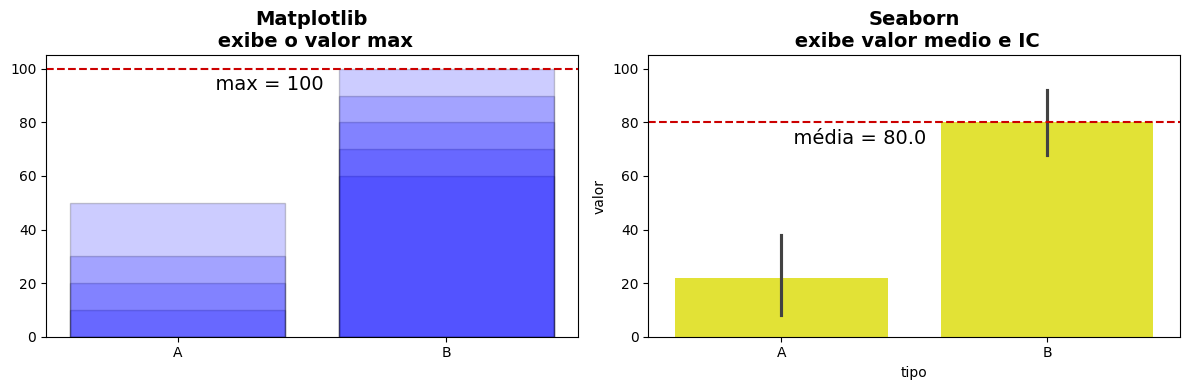

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='blue',edgecolor='k',alpha=0.2)

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()



Dificilmente o gráfico do `Matplotlib` (em particular o anterior sem os contornos e o grau de transparência) será a visualização que você está buscando para vários valores de uma categoria e a solução do `Seaborn` neste caso parece  mais adequada. Mas é apenas por que esses pacotes empregam conceitos diferentes e cabe a você entender como cada ferramenta funciona para buscar a visualização correta. A mesma confusão ocorre para quem emprega o gráfico do `Seaborn` sem compreender por exemplo os intervalos de confiança, achando estranho o `Seaborn` adicionar uma linha no final das barras como se fosse um efeito estético apenas. Note ainda que as soluções coincidem se temos apenas um valor por classe, o que permite muitas vezes empregarmos ambos os pacotes sem perceber essa diferença no conceito dos pacotes.

Uma alternativa para ter o mesmo resultado do `Seaborn` com o `Matplotlib` é você produzir e exibir os valores médios, o que provavelmente será sempre preferível à solução de exibir os vários valores sobrepostos. Isso é bastante simples e temos inúmeras formas de fazer isso. Podemos, por exemplo, empregar a função `groupby` do `Pandas`. Para produzirmos os intervalos de confiança, e obtermos um resultado similar ao `Seaborn`, empregamos o desvio padrão dos valores mas exibir esse intervalo é obviamente opcional.


In [24]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


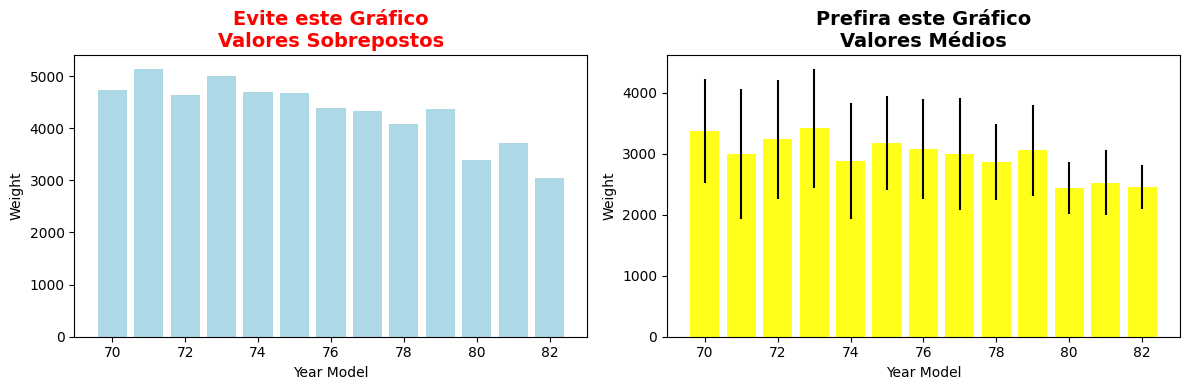

In [25]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(cars.model_year, cars.weight, color='lightblue')

plt.title('Evite este Gráfico\nValores Sobrepostos',fontsize=14,weight='bold',color='r')
plt.xlabel('Year Model')
plt.ylabel('Weight')

plt.subplot(1,2,2)
g = cars.groupby('model_year').weight.mean()
g_std = cars.groupby('model_year').weight.std()
plt.bar(g.keys(), g.values, yerr=g_std.values, color='yellow',alpha=0.9)

plt.title('Prefira este Gráfico\nValores Médios',fontsize=14,weight='bold')
plt.xlabel('Year Model')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()


## Gráficos de Hastes ou *Pirulito*

Gráficos de barras tornam-se bastante enfadonhos quando precisamos representar uma quantidade de valores muito grandes. Uma alternativa nestes casos é empregarmos um gráfico de hastes, ou `stem` do `Matplotlib`. Esses gráficos também são chamados de *lollipop*, ou gráficos *pirulito*.

Se quisermos, por exemplo, exibir a produção de energia térmica de todos os países no nosso conjunto de dados da Matriz Européia de energia, serão 36 barras de valores e parece mais eficiente a representação abaixo.

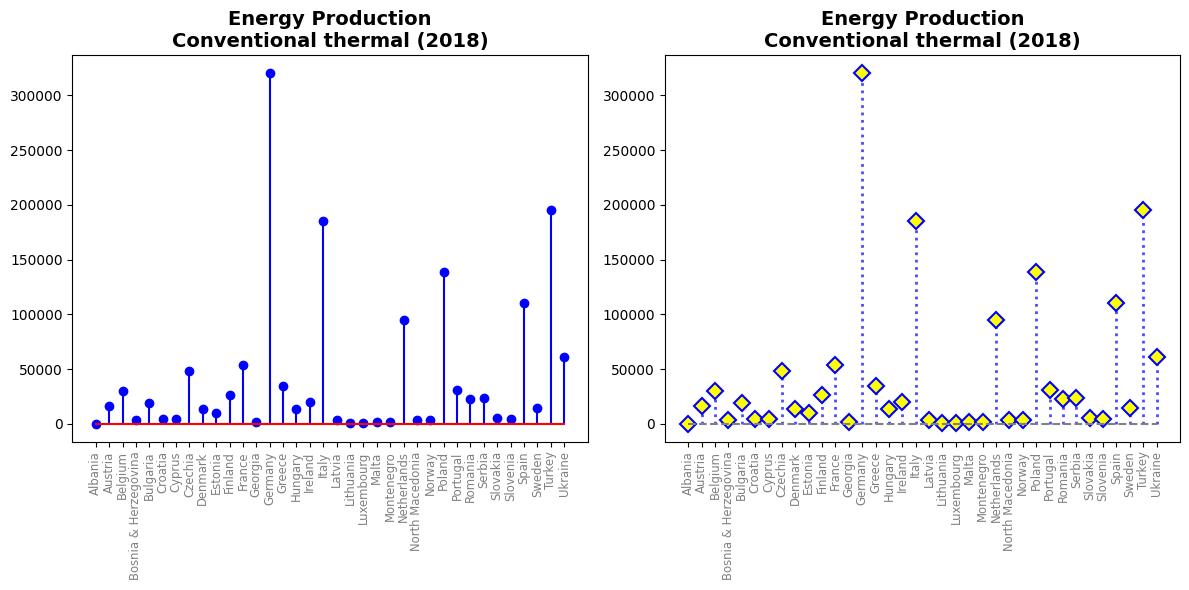

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],df[ df['type'] == 'Conventional thermal']['2018'], linefmt='b-', markerfmt='bo', basefmt='r-')

plt.xticks(rotation=90, color='grey', fontsize='small')
plt.title("Energy Production\nConventional thermal (2018)", fontsize=14, weight='bold')

plt.subplot(1,2,2)

# change color and shape and size and edges
(markers, stemlines, baseline) = plt.stem(df[ df['type'] == 'Conventional thermal']['country_name'],
                                          df[ df['type'] == 'Conventional thermal']['2018'])
plt.setp(markers, marker='D', markersize=8, markeredgecolor='b', markeredgewidth=1.5, color='yellow')
plt.setp(stemlines, linestyle='dotted' ,lw=2, color='b', alpha=0.7)
plt.setp(baseline, color='grey', linestyle='dashed')
plt.xticks(rotation=90, color='grey', fontsize='small')

plt.title("Energy Production\nConventional thermal (2018)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()





Mas essa é uma função que ainda pouco desenvolvida no pacote e sem muita atenção. Por exemplo, a alteração dos parâmetros das linhas, exceto para parâmetros básicos, requer o uso do `plt.step()`, que é apenas um comando em torno do `plot` que altera opções de formatação do `plot`, e a maioria dos parâmetros do gráfico também podem ser usados ​​aqui. E no momento que fazemos este material o gráfico de linhas horizontal ainda está em desenvolvimento, apesar da documentação indicar a disponibilidade do parâmetro `orientation`.

Assim, parece simples o suficiente empregarmos os displays de linhas verticais para criarmos esses gráficos não sendo necessário uma função específica para isso. Abaixo, na ausência da opção horizontal do `stem` criamos o gráfico horizontal empregando apenas o `hlines` para linhas e o `plot` para os `markers` finais, incluindo ainda a ordenação dos valores, funções que você já conheceu nos capítulos anteriores.

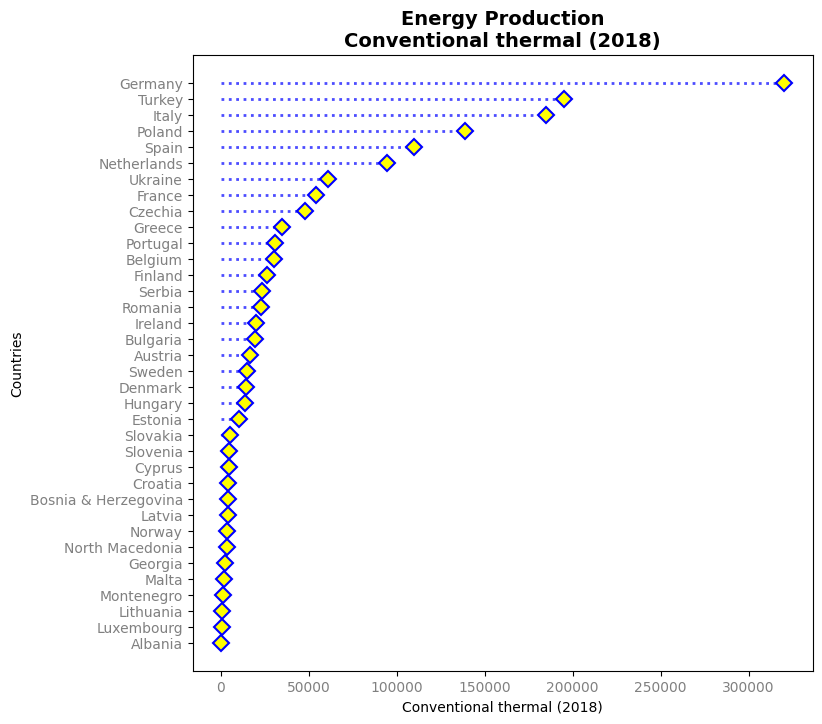

In [27]:
plt.figure(figsize=(8, 8))
# Create a dataframe
dftemp = df[df['type'] == 'Conventional thermal'][['country_name','2018']]

# Reorder it based on values:
ordered_df = dftemp.sort_values(by='2018')
my_range=range(1,len(ordered_df)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['2018'], linestyle='dotted' ,lw=2, color='b', alpha=0.7)
lines = plt.plot(ordered_df[['2018']], my_range, "o" , color='green')
plt.setp(lines, marker='D', markersize=8, markeredgecolor='b', markeredgewidth=1.5, color='yellow')

# Add titles and axis names
plt.title("Energy Production\nConventional thermal (2018)", fontsize=14, weight='bold')
plt.xticks(color='grey')
plt.yticks(my_range, ordered_df['country_name'],color='grey')
plt.xlabel('Conventional thermal (2018)')
plt.ylabel('Countries')

plt.show()

## Gráficos de Pizza, por que evitar?

Gráficos de pizza são representações populares, sobretudo na mídia, e são freqüentemente empregados para mostrar as proporções de um todo. Mas são gráficos que encontram pouca aceitação por estatísticos,  publicações acadêmicas e científicas, ou outros meios especializados sendo considerados gráficos bastante *pobres*.

Já em 1918 Willard C. Brinton (1918), engenheiro e pesquisador em visualização de dados, argumentava em seu livro *Graphic Methods for Presenting Facts* que os gráficos de pizza não eram uma "forma desejável de apresentação", considerando-os difíceis de decifrar e quase sempre sendo melhor usar uma representação por gráfico de barras. Em 1984, os estatísticos William Cleveland e Robert McGill (1984) mostraram experimentalmente que as pessoas tem muito mais probabilidade de avaliar com precisão as informações quando colocadas em um gráfico de barras do que em um gráfico de pizza. Eles mostraram que todos nós temos muito mais dificuldade de interpretar as quantidades em ângulos, e que tendemos a subestimar o tamanho de ângulos agudos ($\lt 90°$) e a superestimar o tamanho de ângulos obtusos ($\lg 90°$). E, Edward Tufte (2001), um dos grandes nomes da visualização chega mesmo a afirmar que esses gráficos jamais deveriam ser utlizados. O próprio pacote `Seaborn`, mais atual e construído sobre o `Matplotlib`, se quer possui uma função para produzir esse tipo de gráfico como vimos no capítulo de Introdução.

Você pode ter uma ideia do experimento de Cleveland e McGill e da dificuldade que temos de avaliar valores a partir de ângulos observando os gráficos de pizza e de barra a seguir. **Que gráficos melhor permitem você ordenar os valores?** Você poderá então, por si próprio, entender por que esses gráficos devem ser evitados e, sempre que possível, substituirmos por gráficos de barra ou representações melhores.


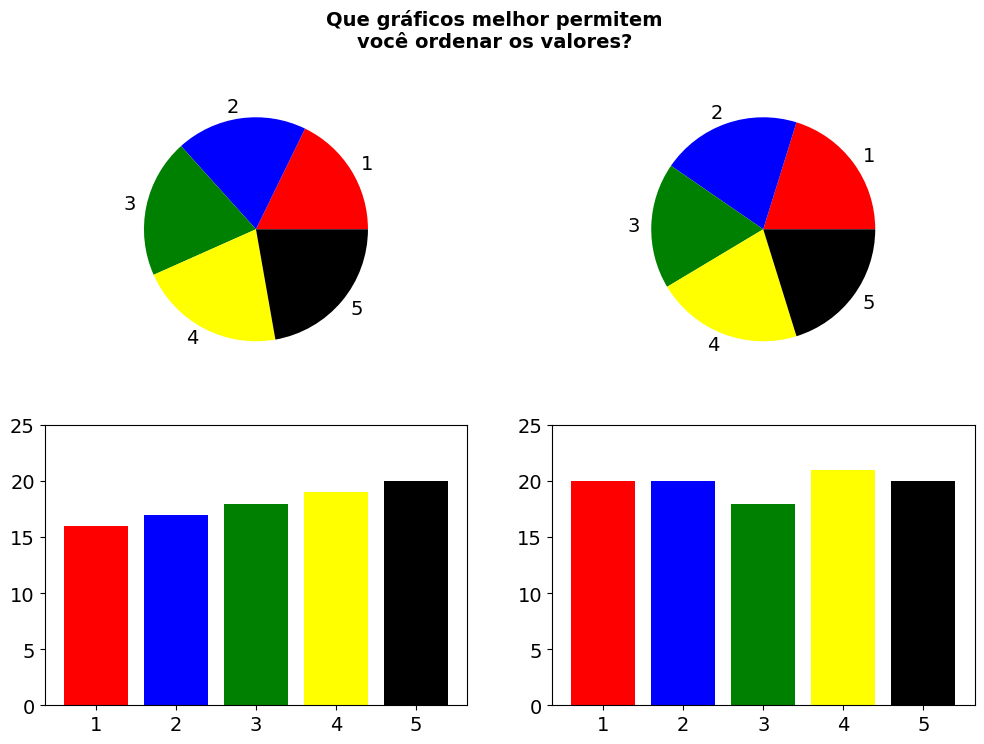

In [28]:
# Adaptado de
# Wikipedia, User:Schutz. 2007. “File:Piecharts.svg.” https://en.wikipedia.org/wiki/File:Piecharts.svg.
#
plt.figure(figsize=(12,8))

plt.suptitle('Que gráficos melhor permitem\nvocê ordenar os valores?', fontsize=14, weight='bold')

plt.subplot(2,2,1)
plt.pie([16,17,18,19,20],labels=[1,2,3,4,5],colors=['r','b','g','yellow','k'],
        textprops={'fontsize': 14})

plt.subplot(2,2,3)
plt.bar(height=[16,17,18,19,20],x=[1,2,3,4,5],color=['r','b','g','yellow','k'])
plt.yticks([0,5,10,15,20,25],fontsize=14)
plt.xticks(fontsize=14)

plt.subplot(2,2,2)
plt.pie([20,20,18,21,20],labels=[1,2,3,4,5],colors=['r','b','g','yellow','k'],
        textprops={'fontsize': 14})

plt.subplot(2,2,4)
plt.bar(height=[20,20,18,21,20],x=[1,2,3,4,5],color=['r','b','g','yellow','k'])
plt.yticks([0,5,10,15,20,25],fontsize=14)
plt.xticks(fontsize=14)

plt.show()

Apesar disso, por uma série de motivos, gráficos de pizza continuam a ser empregados e pode ser que, independente de qualquer coisa você seja requisitado a criar um gráfico desse tipo e, então, vale a pena olharmos brevemente como produzir esses gráficos e alguns de seus recursos que podem melhorar a sua legibilidade.

Para simplificar a apresentação desses recursos vamos separar dos dados de energia dos exemplos anteriores os dados de apenas dois países, França e Alemanha, e seus cinco tipos de maior produção.


In [29]:
df2 = df.copy()
df2 = pd.concat([df2[ df2.country_name == 'France' ].nlargest(5, columns='2018'),
                 df2[ df2.country_name == 'Germany' ].nlargest(5, columns='2018')])

Os gráficos são produzidos de forma bastante direta, recebendo uma única série de dados que será distribuída proporcionalmente como setores do círculo.

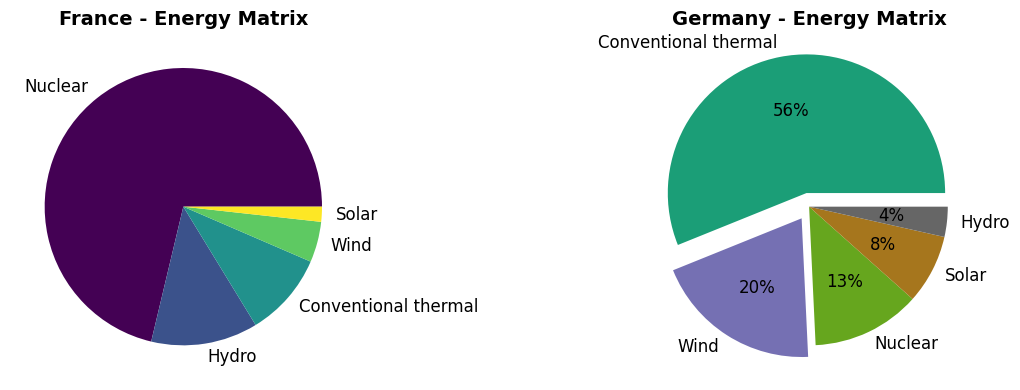

In [30]:
import matplotlib.pyplot as plt
cmap = cm.viridis(np.linspace(0, 1, len(top5)))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.pie(df2[ df2.country_name == 'France' ][ '2018' ], labels=df2[ df2.country_name == 'France' ][ 'type' ], textprops={'size': '12'}, colors=cmap )
plt.title('France - Energy Matrix', fontsize=14 , weight='bold')

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))
plt.pie(df2[ df2.country_name == 'Germany' ][ '2018' ] , labels=df2[ df2.country_name == 'Germany' ][ 'type' ], colors=cmap,
        autopct='%.0f%%',
        textprops={'size': '12'},
        explode=[0.1,0.1,0,0,0])

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')

plt.tight_layout()
plt.show()


Aqui alguns parâmetros empregados no segundo gráfico requerem nossa atenção pois. Eles permitirem enriquecer esses gráficos e aprimorar a sua legibilidade e comunicação:

```
        autopct='%.0f%%',
        textprops={'size': '12'},
        explode=[0.1,0.1,0,0,0])

```
O parâmetro `autopct` é empregado para exibir os valores percentuais no gráfico com a formatação `'%.0f%%'` indicada. `textprops` permite alterar as propriedades do texto e são especificadas em formato de um dicionário. O parâmetro `explode` é bastante útil e permite descatar setores do círculo que desejamos ressaltar. Por exemplo, destacamos no segundo gráfico as duas maiores fontes de energia da Alemanha. Esses recursos, certamente, contribuem para comunicar melhor os dados.

### *Donuts* ou Gráficos de Rosca, e Legendas

Outros recursos já exigem um domínio técnico um pouco maior e nem sempre tão claros de empregar. O uso das legendas, por exemplo, requer empregar o retorno dos rótulos da função `pie` e para que não sejam exibidos repetidamente ao longo do gráfico os rótulos recebem a propriedade de cor 'color':'w' (*white*) que tornam transparente a exibição, num 'truque' bastante técnico.

Já os *Donuts* ou Gráficos de Rosca, são uma versão bastante comum dos gráficos de pizza, requererem produzir a imagem de um círculo branco no centro do gráfico de pizza e, desse modo, ocultar o centro do gráfico. Deixo abaixo esses exemplos para que possa utilizar esses recursos também.

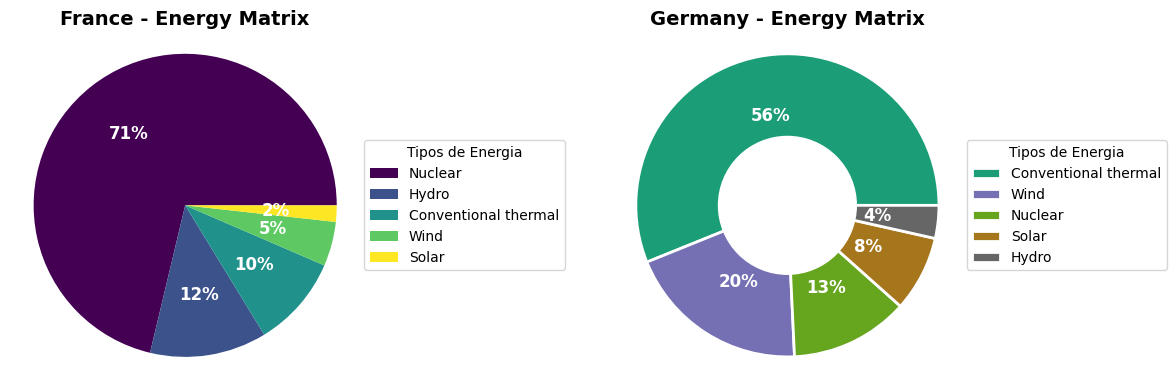

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
cmap = cm.viridis(np.linspace(0, 1, len(top5)))
wedges, texts, _ = plt.pie(df2[ df2.country_name == 'France' ][ '2018' ].replace(0,1) , labels=df2[ df2.country_name == 'France' ][ 'type' ],
        textprops={'size': '12', 'color':'w', 'weight':'bold'},
        radius=1.1,
        autopct='%.0f%%',
        colors=cmap )
plt.title('France - Energy Matrix', fontsize=14 , weight='bold')

plt.legend(wedges, df2[ df2.country_name == 'France' ][ 'type' ],
          title="Tipos de Energia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))
wedges, texts, _ = plt.pie(df2[ df2.country_name == 'Germany' ][ '2018' ] , labels=df2[ df2.country_name == 'Germany' ][ 'type' ], colors=cmap,
                        textprops={'size': '12', 'color':'w', 'weight':'bold'},
                        autopct='%.0f%%',
                        radius=1.1,
                        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')

my_circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('off')

plt.legend(wedges, df2[ df2.country_name == 'Germany' ][ 'type' ],
          title="Tipos de Energia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


## Mapas de Árvore

Um Treemap ou mapa de árvore exibe dados hierárquicos como um conjunto de retângulos aninhados e parece ser uma boa opção em muitos casos em que desejamos representar como um todos encontra-se dividido em suas partes (algo bastante semelhante ao que um gráfico de pizza se propõe).

Neste tipo de gráfico cada grupo é representado por um retângulo, cuja área é proporcional ao seu valor, do mesmo modo que em um gráfico de pizza em que cada setor é porporcional ao valor. Mas esses gráficos em geral são entendidos como mais fáceis de interpretar, uma vez que as grandezas não estão represntadas por ângulos mas por áreas dos retângulos.

Nem o `Matplotlib` nem o `Seaborn` implementam uma função direta para isso, mas há um pacote independente, o `squarify`, desenvolvido sobre o `Matplotlib`, que permite criar esses Mapas de Árvore e são uma boa opção aos gráficos de pizza.

In [32]:
!pip install squarify

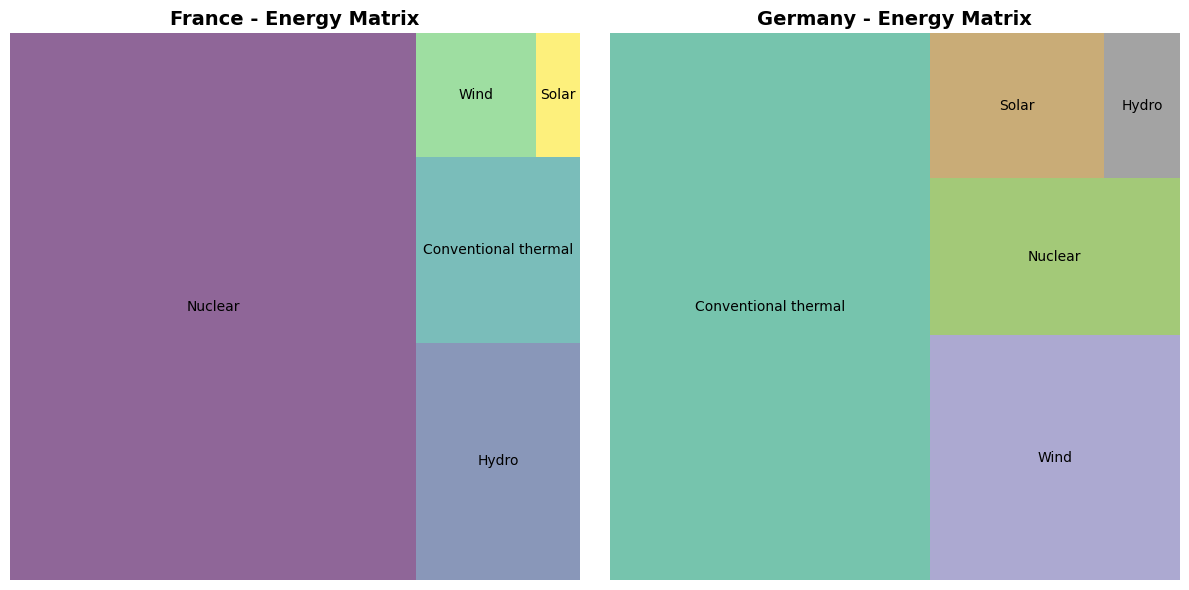

In [33]:
import squarify # pip install squarify (algorithm for treemap)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
cmap = cm.viridis(np.linspace(0, 1, len(df2['type'].unique())))

squarify.plot(sizes= df2[ df2.country_name == 'France' ][ '2018' ].replace(0,1) , label=df2[ df2.country_name == 'France' ][ 'type' ], alpha=.6, color=cmap )

plt.title('France - Energy Matrix', fontsize=14 , weight='bold')
plt.axis('off')

plt.subplot(1,2,2)
cmap = cm.Dark2(np.linspace(0, 1, len(df2['type'].unique())))

squarify.plot(sizes= df2[ df2.country_name == 'Germany' ][ '2018' ] , label=df2[ df2.country_name == 'Germany' ][ 'type' ], alpha=.6, color=cmap )

plt.title('Germany - Energy Matrix', fontsize=14 , weight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()


## Gráficos de radar

Um gráfico de radar, gráfico de aranha ou ainda gráfico polar, também permite visualizar uma ou mais categorias sobre múltiplas variáveis ​​quantitativas sendo, portanto, mais uma alternativa a gráficos de barra quando se deseja comparar valores.

Neste tipo de gráfico cada variável quantitativa tem seu próprio eixo em torno de um círculo e iniciamos a construção desse gráfico exatamente dividindo o círculo entre as diversas variáveis quantitativas que queremos exibir. Os valores são então exibidos ao longo do eixo. Uma ou mais categorias dos mesmos valores podem ser então exibidas.

Esses gráficos podem ter grande impacto visual mas apresentam uma série dificuldades e cuidados que não trataremos aqui nesta introdução e se você tiver interesse pode verificar a bibliografia no final do livro e consultar *The Radar Chart and Its Caveats* para saber mais.



<ipython-input-34-5134c1fb36dc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['type'].replace('Conventional thermal','Thermal',inplace=True)


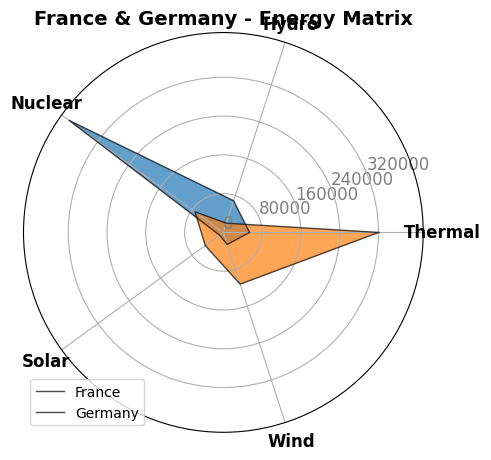

In [34]:
from math import pi

df2 = df2.sort_values('type')
df2['type'].replace('Conventional thermal','Thermal',inplace=True)
categories = df2['type'].unique().tolist()

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(5,5))
plt.subplot(1,1,1, polar=True)

for country in df2['country_name'].unique():

  plt.xticks(angles[:-1], categories, size=12, weight='bold')
  plt.yticks(np.arange(0,max(df2['2018']), 80000), size=12, color='grey')
  val_c1 = df2[ df2['country_name'] == country ]['2018'].tolist()
  val_c1 += val_c1[:1] # repeat the first value to close the circular graph
  plt.plot(angles, val_c1, linewidth=1, label=country, color='k', alpha=0.7)
  plt.fill(angles, val_c1, alpha=0.7)
  plt.title('France & Germany - Energy Matrix', fontsize=14 , weight='bold')

  plt.legend(loc='lower left')

plt.tight_layout()
plt.show()